## Sentiment Analysis 

This is one of the applications of natural language processing. It is used to detect positive, negative and neutral comments in a textual data. In the project, we are going to take a look at a data on a restaurant reviews. We are going to analyse and predict the bias in comment whether positive, negative or neutral. 

## Importing libraries 

In [1]:
# import data preprocessing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import regular expression
import re 

# import natural language processing libraries 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import bigrams, trigrams, ngrams
from nltk.probability import FreqDist
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# import text preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# import classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


# import evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,auc,recall_score,roc_curve

## Importing the dataset

In [2]:
file = pd.read_csv("Restaurant_Reviews.tsv", delimiter= "\t", quoting= 3)
file.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
with open("Restaurant_Reviews.tsv", "r") as file:
    document = file.read()
print(document)

Review	Liked
Wow... Loved this place.	1
Crust is not good.	0
Not tasty and the texture was just nasty.	0
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1
The selection on the menu was great and so were the prices.	1
Now I am getting angry and I want my damn pho.	0
Honeslty it didn't taste THAT fresh.)	0
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0
The fries were great too.	1
A great touch.	1
Service was very prompt.	1
Would not go back.	0
The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.	0
I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!	1
I was disgusted because I was pretty sure that was human hair.	0
I was shocked because no signs indicate cash only.	0
Highly recommended.	1
Waitress was a little slow in service.	0
This place is not worth your time, let alone Vegas.	0
did not like at all.	0
The Burrittos Blah!	0
Th

In [3]:
len(file)

1000

## Preprocessing the text data 

In natural language processing, there are steps to follow to clean up the data. These are:

1. Tokenization: This involves splitting data into wods and sentences.
2. Removal stopwords: stopwords are words that have negligible meaning. Hence, they are removed from the data to increase run time and improve data quality. Stopwords are filtered before or after text processing.
3. Stemming: This technique involves reducing words to its common base (root) by removing the suffixes.
4. Lemmatization: This reduces words to its common base but take into consideration its morphological analysis.
5. Part of speech (POS): This mark words in the corpus to a corresponding part of speech based on the definition and context.
6. Regex: This is a powerful tool to apply additional filtering to data. It involves removing non-words in the textual data.
7. Feature extraction: This convert textual data into vector of numbers. As we know machine learning cannot work with raw data directly. In the analysis, I would use bag of words feature extraction technique.

In [4]:
# data cleaning 
cleaned_data = []
for i in range(0,1000):
    pattern = '[^a-zA-Z]'
    review = re.sub(pattern, " ", file["Review"][i])
    review = review.lower()
    review = review.split()
    all_stopwords = stopwords.words("english")
    all_stopwords.remove("not")
    stem = PorterStemmer()
    review = [stem.stem(word) for word in review if not word in all_stopwords]
    review = " ".join(review)
    cleaned_data.append(review)
    
print(cleaned_data)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [5]:
# creating bag of words
cv = CountVectorizer()
X = cv.fit_transform(cleaned_data).toarray()
y = file.iloc[:,-1].values

In [6]:
print(cv.get_feature_names())

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 

## Splitting dataset into train and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

## Classification models

After preprocessing our text data. We are going to create models using various classifiers. we start by applying logistics regression.

In [8]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

## Evaluate on the test set 

In [9]:
# Predicting the test result 
y_pred = log.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_pred),1)),1))

[[1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]

Observing the data, it can be seen that our model predicted the same as the actual one for the first data. We can see that our model predicted values are on the left side of the result and the actual values on the right side. We can compare the predicted values with the actual values.                            

[[82 20]
 [22 76]]


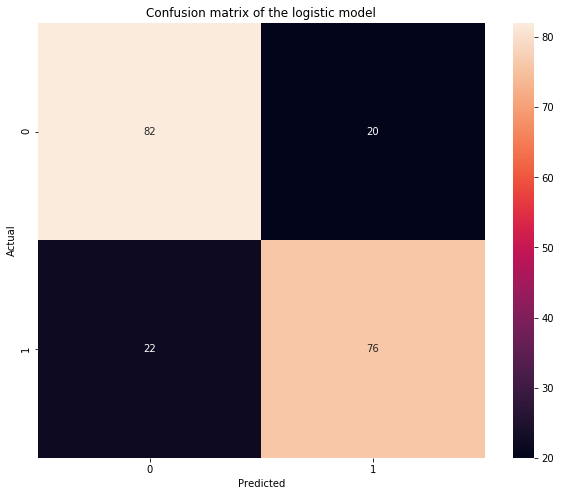

In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix of the logistic model")
print(cm)

In [11]:
def metrics(accuracy):
    return accuracy_score(y_test, y_pred)

metrics("accuracy")

0.79

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       102
           1       0.79      0.78      0.78        98

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



## Train Tree-based method on the data

### Decision Tree

In [14]:
# Decision Tree
tree = DecisionTreeClassifier(criterion = "gini", splitter = "best")
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predict the test result 

In [15]:
tree_pred = tree.predict(X_test)

In [16]:
print(np.concatenate((tree_pred.reshape(len(tree_pred),1), y_test.reshape(len(y_pred),1)),1))

[[1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]

[[81 21]
 [27 71]]


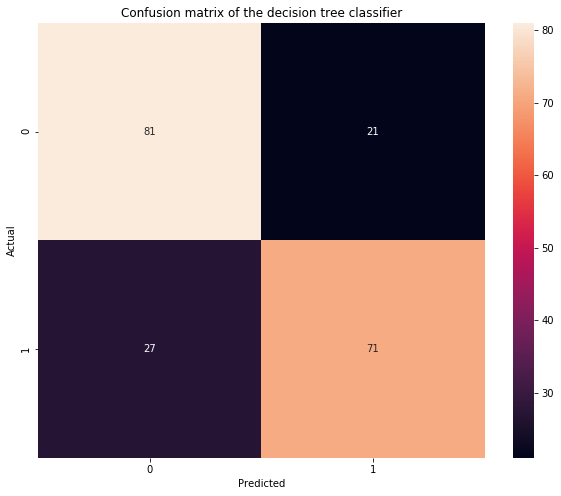

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, tree_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix of the decision tree classifier")
print(cm)

In [18]:
dt_acc = accuracy_score(y_test, tree_pred)
print("decision_tree_acc:", dt_acc)
print(classification_report(y_test, tree_pred))

decision_tree_acc: 0.76
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       102
           1       0.77      0.72      0.75        98

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



### RandomForest 

In [19]:
# creating a random forest
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [20]:
rf_pred = rf.predict(X_test)

[[88 14]
 [33 65]]


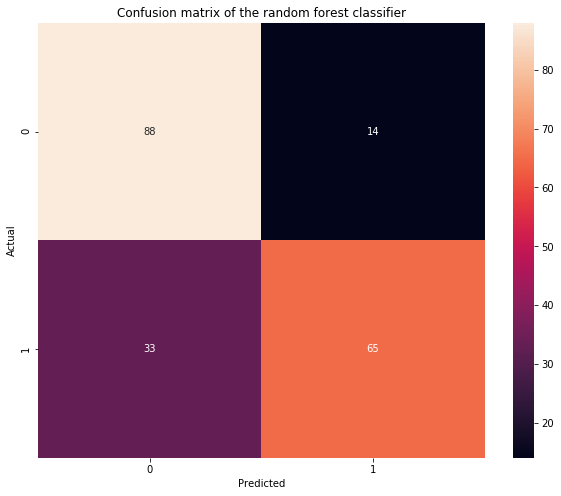

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix of the random forest classifier")
print(cm)

In [22]:
rf_acc = accuracy_score(y_test, rf_pred)
print("random_forest_acc:", rf_acc)
print(classification_report(y_test, rf_pred))

random_forest_acc: 0.765
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       102
           1       0.82      0.66      0.73        98

    accuracy                           0.77       200
   macro avg       0.78      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



## Train Naive bayes on the training sets

In [23]:
# naive bayes model
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [24]:
NB_pred = NB.predict(X_test)

[[50 52]
 [14 84]]


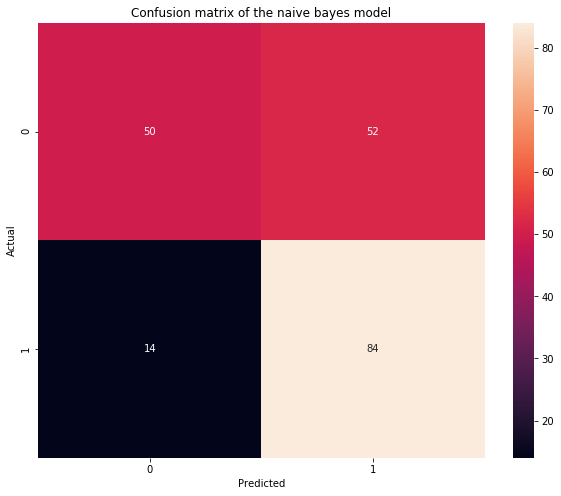

In [25]:
# Confusion matrix
cm = confusion_matrix(y_test, NB_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix of the naive bayes model")
print(cm)

In [26]:
NB_acc = accuracy_score(y_test, NB_pred)
print("naive_bayes:", NB_acc)
print(classification_report(y_test, NB_pred))

naive_bayes: 0.67
              precision    recall  f1-score   support

           0       0.78      0.49      0.60       102
           1       0.62      0.86      0.72        98

    accuracy                           0.67       200
   macro avg       0.70      0.67      0.66       200
weighted avg       0.70      0.67      0.66       200



### Conclusion

It was observed that our classifiers worked well on the text data. Random forest achieved 79.5% and performed slightly over logistic regression and decision tree classifier. On the other hand, naive bayes underperformed with 67% accuracy. This indicated that tree based methods work best on natural language processing problem.